In [14]:
#import potrebných knižníc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#príprava dát
df= pd.read_csv('kosatec_data.csv', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,kosatec_sibirsky
1,4.9,3.0,1.4,0.2,kosatec_sibirsky
2,4.7,3.2,1.3,0.2,kosatec_sibirsky
3,4.6,3.1,1.5,0.2,kosatec_sibirsky
4,5.0,3.6,1.4,0.2,kosatec_sibirsky
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,kosatec_bezlisty
146,6.3,2.5,5.0,1.9,kosatec_bezlisty
147,6.5,3.0,5.2,2.0,kosatec_bezlisty
148,6.2,3.4,5.4,2.3,kosatec_bezlisty


In [16]:
# konštruktor perceptrónu
class Perceptron():   
    #vytvorenie metódy init
    def __init__(self, rychlost_ucenia=0.01, pocet_iteracii=10): #zadanie parametrov učenia
        #vloženie parametrov do premenných
        self.eta = rychlost_ucenia 
        self.n_iter = pocet_iteracii      
    #vytvorenie metódy fit, v ktorej prebieha učenie s trénovacou maticou X a polom y s očakávanými výsledkami
    #do funkcie vstupujú x a y z datasetu
    def fit(self, X,y):
        #vytvorenie váh ako nulová matica kde prvý stĺpec je bias
        #šírka pola je 1+(počet prvkov v riadku matice x)
        self.vahy = np.zeros(1+ X.shape[1])
        #vytvorenie prázdneho pola pre ukladanie chýb
        self.errors_=[]
        
        #cyklus pre uskutočnenie nami zadaného počtu iterácií, teda počet prejdení po datasete
        for i in range(self.n_iter):
            #pomocou errors budeme vedieť koľko chýb nastane počas iterácií
            errors = 0 
            #v cykle sa uskutočňuje učenie siete
            for matica,vystup in zip(X,y):
                update = self.eta * (vystup-self.predikcia(matica))
                #pomocou hodhoty update upravíme váhy
                self.vahy[1:] += update*matica
                self.vahy[0]+= update
                #keď hodnota update nie je 0, nastala chyba a errors sa zvýši
                errors += int(update !=0.0)
            #do poľa errors je vložená premenná errors, použijeme na vykreslenie grafu
            self.errors_.append(errors)
        return self  
    #pripočítame k váham bias, kt. dovoľuje posunutie aktivačnej funkcie vpravo al. ľavo 
    #vypočítanie výstupu perceptrónu
    def net_input(self, X):
        return np.dot(X, self.vahy[1:])+ self.vahy[0]
    #počítanie predikcie, určíme typ kosatca, vráti 1 keď net_input je >=0 a vráti -1 v opačnom prípade
    def predikcia(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [17]:
#nacitanie prvych 100 hodnot z 1. a 3. stplca datasetu do matice 
x=df.iloc[0:100,[0,2]].values
#nacitanie hodnot 5. stpca datesetu do matice
y=df.iloc[0:100,[4]].values

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]


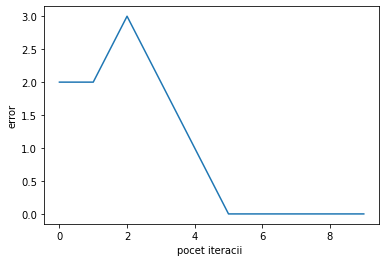

In [23]:
skupinyRastlin=np.where(y=='kosatec_sibirsky',-1,1) #ak sa 5. stĺpec zhoduje s  kosatec_sibirsky daj -1 ak nie 1
#nastavíme rýchlosť učenia na 0.1 a počet iterácii na 10
ppn=Perceptron(0.1, 10)
#spustenie funkcie fit s parametrami x a skupinyRastlin, ktoré sme načítali z datasetu
ppn.fit(x,skupinyRastlin)

print(ppn.errors_)
plt.plot(ppn.errors_)

plt.xlabel('pocet iteracii ') #number of epochs(počet prejdení po datasete)
plt.ylabel('error')
plt.show()#zobrazenie grafu

In [26]:
print(x[:5]) #výpis matice x, prvých 5 hodnôt
print(y) #výpis matice y, všetky hodnoty

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]
[['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky']
 ['kosatec_sibirsky'

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]


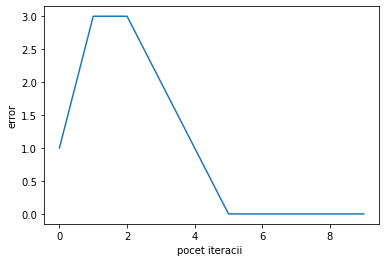

In [20]:
skupinyRastlin2=np.where(y=='kosatec_roznofarebny',-1,1) #ak sa 5. stĺpec zhoduje s  kosatec_roznofarebny daj -1 ak nie 1
#nastavíme rýchlosť učenia na 0.1 a počet iterácii na 10
ppn=Perceptron(0.1, 10)

ppn.fit(x,skupinyRastlin2)

print(ppn.errors_)
plt.plot(ppn.errors_)

plt.xlabel('pocet iteracii ') #number of epochs(počet prejdení po datasete)
plt.ylabel('error')
plt.show()#zobrazenie grafu

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


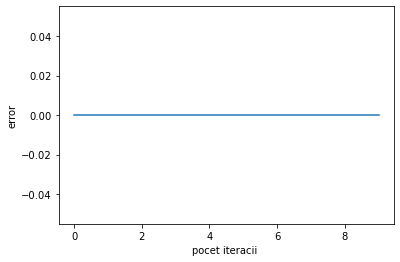

In [22]:
skupinyRastlin3=np.where(y=='kosatec_bezlisty',-1,1)#ak sa 5. stĺpec zhoduje s  kosatec_bezlisty daj -1 ak nie 1
#nastavíme rýchlosť učenia na 0.1 a počet iterácii na 10
ppn=Perceptron(0.1, 10)

ppn.fit(x,skupinyRastlin3)

print(ppn.errors_)
plt.plot(ppn.errors_)

plt.xlabel('pocet iteracii ') #number of epochs(počet prejdení po datasete)
plt.ylabel('error')
plt.show() #zobrazenie grafu

In [6]:
import matplotlib.pyplot as plt

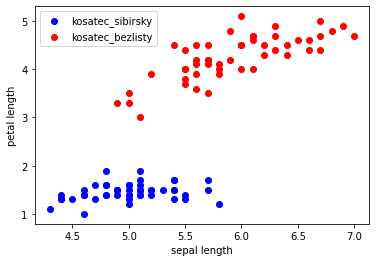

In [34]:
plt.scatter(x[:50,0],x[:50,1],color='blue',label='kosatec_sibirsky')
plt.scatter(x[50:100,0],x[50:100,1],color='red',label='kosatec_roznofarebny')

plt.xlabel('sepal length')
plt.ylabel('petal length')

plt.legend()
plt.show()

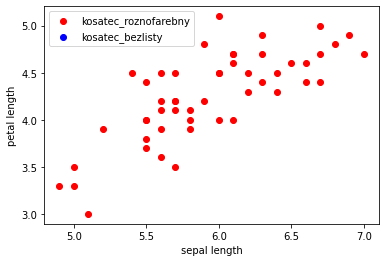

In [36]:
plt.scatter(x[50:100,0],x[50:100,1],color='red',label='kosatec_roznofarebny')
plt.scatter(x[100:,0],x[100:,1],color='blue',label='kosatec_bezlisty')


plt.xlabel('sepal length')
plt.ylabel('petal length')

plt.legend()
plt.show()

In [31]:
y = df.iloc[0:150, 4].values
y

array(['kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirsky',
       'kosatec_sibirsky', 'kosatec_sibirsky', 'kosatec_sibirs